# System Recommendation
by Abdulloh Umar
### Projek 2 machine learning terapan

# 0. Import libraries and modules

In [31]:
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# 1. Load Data

### 1.1 Upload dan ekstrak dataset dari Kaggle

In [32]:
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download --force -d trolukovich/steam-games-complete-dataset

Saving kaggle.json to kaggle (5).json
Dataset URL: https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset
License(s): CC0-1.0
  0% 0.00/24.6M [00:00<?, ?B/s]
100% 24.6M/24.6M [00:00<00:00, 476MB/s]


### Ekstrak file zip

In [33]:
with zipfile.ZipFile('/content/steam-games-complete-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('steam-game-dataset')

### Load data ke DataFrame

In [34]:
df = pd.read_csv('/content/steam-game-dataset/steam_games.csv')
print("Data shape:", df.shape)
df.head()

Data shape: (40833, 20)


,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


# 2. Data Understanding

### Ambil data yg akan di pakai

In [35]:
games_meta_data = df[['name', 'genre']]
games_meta_data.head()

,name,genre
0,DOOM,Action
1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Action,Adventure,Massively Multiplayer"
2,BATTLETECH,"Action,Adventure,Strategy"
3,DayZ,"Action,Adventure,Massively Multiplayer"
4,EVE Online,"Action,Free to Play,Massively Multiplayer,RPG,..."


### Cek info dataset

In [36]:
games_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    40817 non-null  object
 1   genre   40395 non-null  object
dtypes: object(2)
memory usage: 638.1+ KB


### Analisis nilai unik

In [37]:
print('Banyak nama unik di kolom name:', len(games_meta_data.name.unique()))

Banyak nama unik di kolom name: 40750


In [38]:
print('Banyak jenis genre unik di kolom genre:', games_meta_data.genre.unique())

Banyak jenis genre unik di kolom genre: ['Action' 'Action,Adventure,Massively Multiplayer'
 'Action,Adventure,Strategy' ...
 'Action,Free to Play,Massively Multiplayer,Strategy,Early Access'
 'Action,Free to Play,Indie,Massively Multiplayer,Racing,RPG,Simulation'
 'Casual,Free to Play,Indie,Massively Multiplayer,Simulation,Sports']


In [39]:
print('Banyak jenis genre unik di kolom genre:', len(games_meta_data.genre.unique()))

Banyak jenis genre unik di kolom genre: 1769


### Cek missing values

In [40]:
games_meta_data.isnull().sum()

,0
name,16
genre,438


### Visualisasi distribusi genre dengan WordCloud

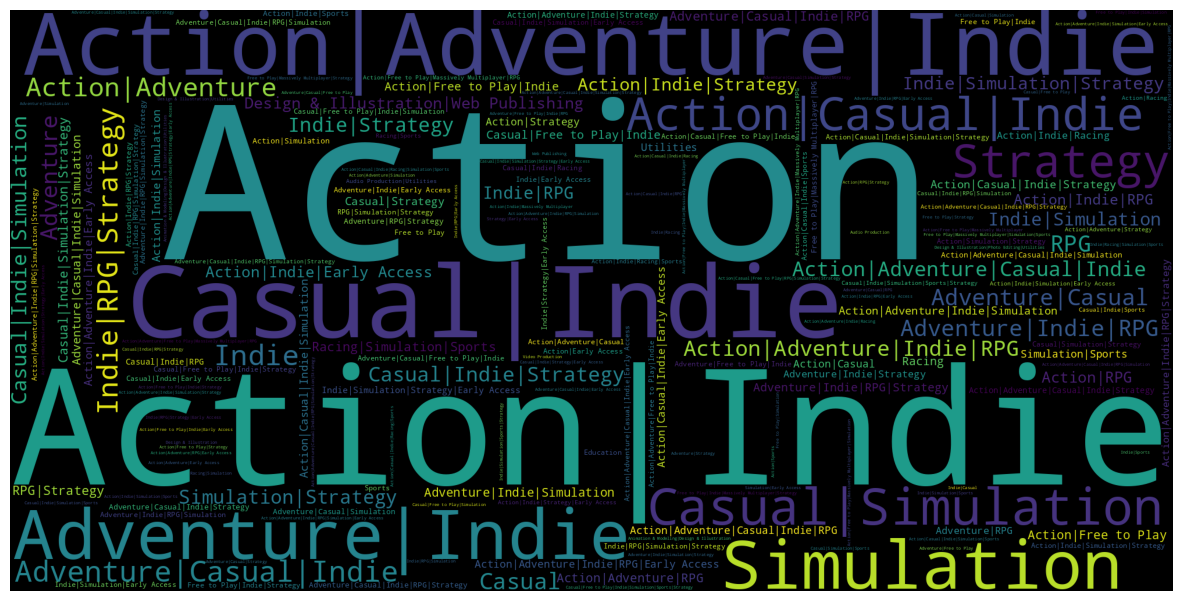

In [41]:
games_meta_data = games_meta_data.copy()
games_meta_data['genre'] = games_meta_data['genre'].str.replace(',', '|') # Ganti pipeline untuk visualisasi yang lebih menarik
all_genres = games_meta_data['genre'].dropna().str.split(',') # Dihapus dulu biar NaN tidak bikin error
flat_genres = [genre.strip() for sublist in all_genres for genre in sublist]
wordcloud = WordCloud(width=2000, height=1000).generate_from_frequencies(Counter(flat_genres))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 3. Data Preparation

### Membersihkan data (hapus NaN dan duplikat)

In [42]:
data_cleaned = games_meta_data.dropna().drop_duplicates('name')
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40327 entries, 0 to 40832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    40327 non-null  object
 1   genre   40327 non-null  object
dtypes: object(2)
memory usage: 945.2+ KB


### Sampling data (10.000 baris)

In [43]:
games_data = data_cleaned.sample(10000, random_state=42).reset_index(drop=True)

### Cek game-game terpilih

In [44]:
print("Contoh nama-nama game yang tersedia:")
print(games_data['name'].sample(20, random_state=1).to_list())

Contoh nama-nama game yang tersedia:
['Away From Beauty 色即是空', 'aMAZE ZER0', 'Drawing Path', 'Train Simulator: Western Lines of Scotland Route Add-On', 'Legend of the Skyfish', 'Ninja Way', 'The Last Night', 'Defiance 2050 - Starter Class Pack', 'Polyventure + OST', 'Zero Escape: The Nonary Games', 'Classic Fun Collection 5 in 1', 'Mantis Burn Racing® - Battle Cars', 'FourChords Guitar Karaoke - Demi Lovato Song Pack', 'Ys VIII: Lacrimosa of DANA - Free Set 1 / 無料お試しセット１', 'My Lovely Daughter - The Inquisitor', 'HIS - [XB-35] Julia Mackin Pack', 'Abstract Hell', 'Sylvio', 'Yametei', 'Dwarven Skykeep']


# 4. Modeling

##  Model 1 : Content-Based Filtering (Cosine Similarity on CountVectorizer)

### Ekstraksi fitur dengan CountVectorizer


In [45]:
tf = CountVectorizer(tokenizer=lambda x: x.split('|'))
tfidf_matrix = tf.fit_transform(games_data['genre'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Hitung cosine similarity


In [46]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=games_data['name'], columns=games_data['name'])

### Mapping indeks untuk rekomendasi


In [47]:
indices = pd.Series(index=games_data['name'], data=games_data.index).drop_duplicates()

## Model 2 : Popularity-Based Recommendation

### Hitung kemunculan setiap genre

In [48]:
from collections import Counter
genre_counts = Counter('|'.join(games_data['genre']).split('|'))

### Ambil 5 genre terpopuler

In [49]:
top_genres = [genre for genre, _ in genre_counts.most_common(5)]

### Ambil game-game dengan genre populer

In [50]:
popular_recommendation = games_data[games_data['genre'].str.contains('|'.join(top_genres))].head(20)

# 5. Evaluasi

### Fungsi rekomendasi

In [51]:
def games_recommendation(games_name, top_n=20, cosine_sim=cosine_sim, items=games_data[['name', 'genre']]):
    # Cek apakah nama game ada dalam index
    if games_name not in indices:
        print("Game tidak ditemukan.")
        return pd.DataFrame()

    # Ambil indeks game berdasarkan nama
    idx = indices[games_name]

    # Hitung skor kemiripan dengan semua game
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan berdasarkan skor tertinggi (kecuali diri sendiri di urutan pertama)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top-N (lewat parameter top_n)
    sim_scores = sim_scores[1:top_n+1]

    # Ambil nama game yang mirip
    game_indices = [i[0] for i in sim_scores]

    # Gabungkan nama & genre
    return pd.DataFrame(games_data.name[game_indices]).merge(items)

### Coba fungsi rekomendasi

In [52]:
# Cek genre target
games_data[games_data.name.eq('Ninja Way')]

# Cek apakah tepat sasaran
recomendation = pd.DataFrame(games_recommendation('Ninja Way'))
recomendation

,name,genre
0,Sounds of Music,Casual|Indie
1,Death Jump,Casual|Indie
2,Black Sand Drift Collector's Edition Content,Casual|Indie
3,NeonBall,Casual|Indie
4,Martha Madison: Waves,Casual|Indie
5,Zup! Zero 2,Casual|Indie
6,Elastrix,Casual|Indie
7,Intelligence,Casual|Indie
8,Cat couple🐱 4,Casual|Indie
9,Oozi: Earth Adventure,Casual|Indie


### Evaluasi akurasi (Precision@K)


In [53]:
def evaluate_recommendation(target_game, recommended_games, k=10):
    target_genre = games_data[games_data['name'] == target_game]['genre'].iloc[0].split('|')
    correct = 0
    for game in recommended_games['name'].head(k):
        recommended_genre = games_data[games_data['name'] == game]['genre'].iloc[0].split('|')
        if any(genre in target_genre for genre in recommended_genre):
            correct += 1
    return correct / k

### Tes akurasi (10 teratas)

In [58]:
precision = evaluate_recommendation('Ninja Way', recomendation, k=10)
print(f"Precision@10: {precision:.2f}")

Precision@10: 1.00


In [57]:
# Evaluasi model 2: Popularity-Based
popularity_recommendation = popular_recommendation[['name', 'genre']]  # Sudah diambil sebelumnya

# Evaluasi akurasi untuk game yang sama (jika ada di data popularity)
precision_popularity = evaluate_recommendation('Ninja Way', popularity_recommendation, k=10)
print(f"Precision@10 (Popularity-Based): {precision_popularity:.2f}")

Precision@10 (Popularity-Based): 0.80
